# Importing relevant libraries and modules

In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as pat

### Importing Datafiles

In [2]:
df=pd.read_csv(r'C:\Users\Ishu Agarwal\Documents\abcd\datafile.csv')
df=df.set_index('States')
df=df[['%age of Persons 2011-12 Rural','%age of Persons 2011-12 Urban','%age of Persons 2011-12 Total']]
df=df/100

df1=pd.read_csv(r'C:\Users\Ishu Agarwal\Documents\abcd\literacy rate.csv')
df1=df1.set_index('All India/State/Union Territory')
df1=df1[['2011 - Rural - Person','2011 - Urban - Persons']]

dnew=pd.merge(df,df1,how='inner',left_index=True,right_index=True)
dnew=dnew.rename(columns={'%age of Persons 2011-12 Rural':'%age of Population below Poverty (Rural)','%age of Persons 2011-12 Urban':'%age of Population below Poverty (Urban)',
                          '%age of Persons 2011-12 Total':'%age of Population below Poverty (Total)','2011 - Rural - Person':'Literacy rate (Rural)',
                          '2011 - Urban - Persons':'Literacy rate (Urban)'})
dnew=(dnew.drop(['Chandigarh','Lakshadweep'])
          .sort_values('%age of Population below Poverty (Total)',ascending=False)
          .drop('%age of Population below Poverty (Total)',axis=1))

### Plotting the datasets

<IPython.core.display.Javascript object>


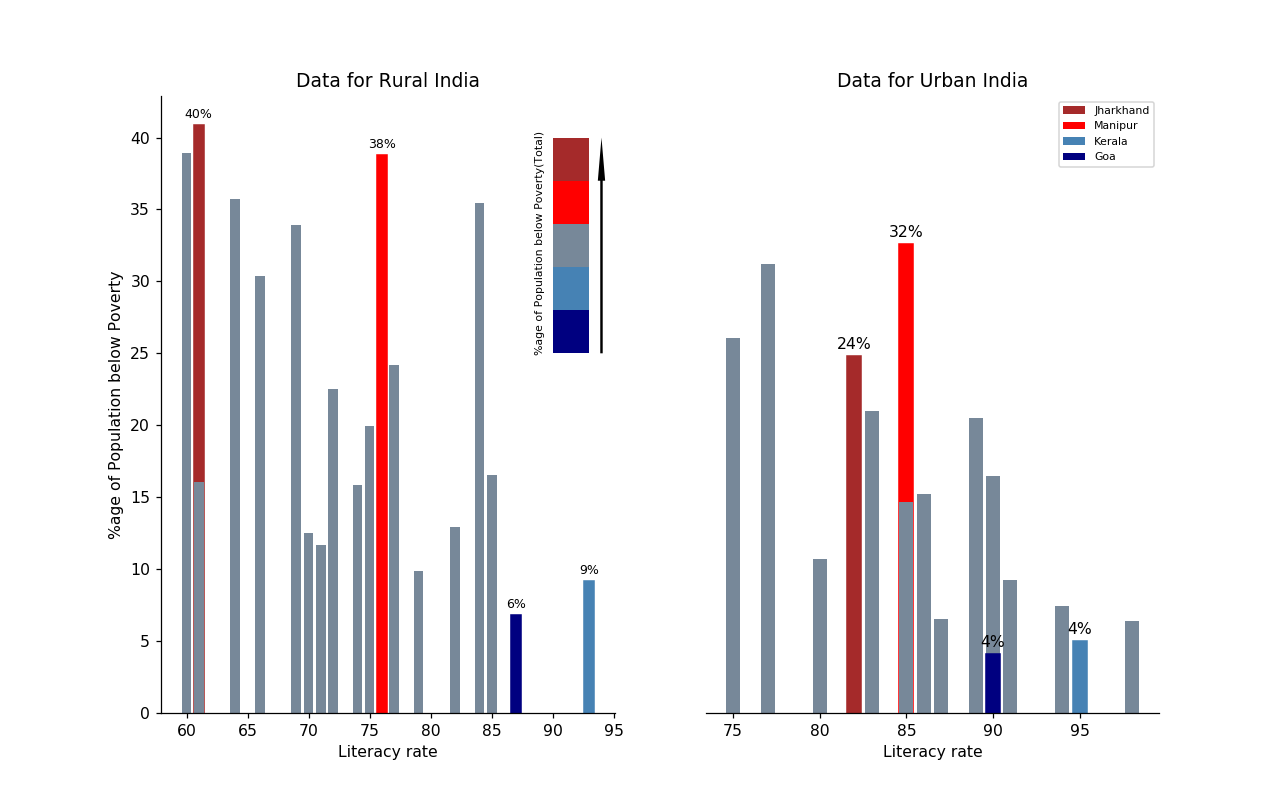

In [5]:
plt.figure()
ax=plt.subplot(1,2,1)
bars=plt.bar(dnew['Literacy rate (Rural)'],dnew['%age of Population below Poverty (Rural)'],width=0.8,color='lightslategrey')
bars[0].set_color('brown')
bars[1].set_color('red')
bars[len(dnew.index)-2].set_color('steelblue')
bars[len(dnew.index)-1].set_color('navy')
plt.ylabel('%age of Population below Poverty')
plt.xlabel('Literacy rate')
plt.title('Data for Rural India')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(bottom='off', left='off', labelleft='off')
l=[bars[0],bars[1],bars[len(dnew.index)-2],bars[len(dnew.index)-1]]
for bar in l:
    plt.gca().text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.5, str(int(bar.get_height()))+'%',ha='center',
                   color='black',fontsize=8)
    
colors=['brown','red','lightslategrey','steelblue','navy']
for c,k in zip(colors,[0,3,6,9,12]):
    ax.add_patch(pat.Rectangle((90,37-k), 3, 3,alpha=1,fc=c))
ax.add_patch(pat.Arrow(94,25,0,15,fc='black'))
plt.gca().text(89,25,'%age of Population below Poverty(Total)',ha='center',
                   color='black',fontsize=7,rotation='vertical')
    
ax=plt.subplot(1, 2,2,sharey=ax)
bars1=plt.bar(dnew['Literacy rate (Urban)'],dnew['%age of Population below Poverty (Urban)'],width=0.8,color='lightslategrey')
bars1[0].set_color('brown')
bars1[1].set_color('red')
bars1[len(dnew.index)-2].set_color('steelblue')
bars1[len(dnew.index)-1].set_color('navy')
plt.xlabel('Literacy rate')
plt.title('Data for Urban India')
colorsnew=['brown','red','steelblue','navy']
lst=[]
for i in colorsnew:
    p=pat.Rectangle((1, 1), 1, 1, fc=i)
    lst.append(p)
plt.legend(loc='upper right',handles=lst,labels=list(dnew.iloc[[0,1,len(dnew.index)-2,len(dnew.index)-1]].index),fontsize=7)#,frameon=False)    
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(bottom='off', left='off', labelleft='off')
plt.gca().axes.get_yaxis().set_visible(False)
l=[bars1[0],bars1[1],bars1[len(dnew.index)-2],bars1[len(dnew.index)-1]]
for bar in l:
    plt.gca().text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.5, str(int(bar.get_height()))+'%',ha='center',
                   color='black')#,fontsi8T)